<a href="https://colab.research.google.com/github/neel06shah/Incentive-Prediction-System/blob/main/Incentive_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('supermarket.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.shape # To check number of rows and columns

(1000, 17)

In [5]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [9]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [10]:
sales.set_index('Date',inplace =True)

In [11]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
sales.describe()  # Statistical Summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
sales.isnull().sum() # To check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
avg_unit_price = sales["Unit price"].astype("float").mean(axis=0)
sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

In [ ]:
from scipy import stats
mode=stats.mode(sales['Quantity'])

print(mode)

ModeResult(mode=array([10]), count=array([119]))


In [ ]:
sales['Quantity'].replace(np.nan, "mode", inplace=True)

In [ ]:
sales.dropna(inplace=True)

In [ ]:
sales.isnull().sum() # Finally we can see No null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


In [ ]:
np.round(sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


Data Cleaning

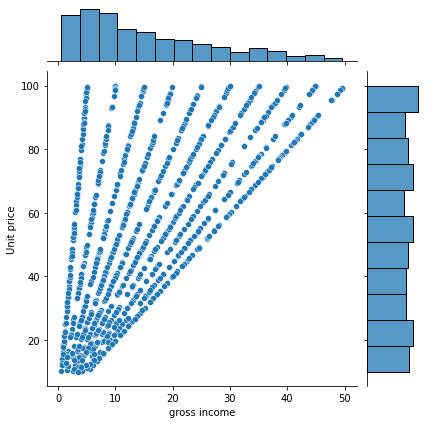

In [ ]:
sns.jointplot(x='gross income', y='Unit price', data=sales)

Data Visualization

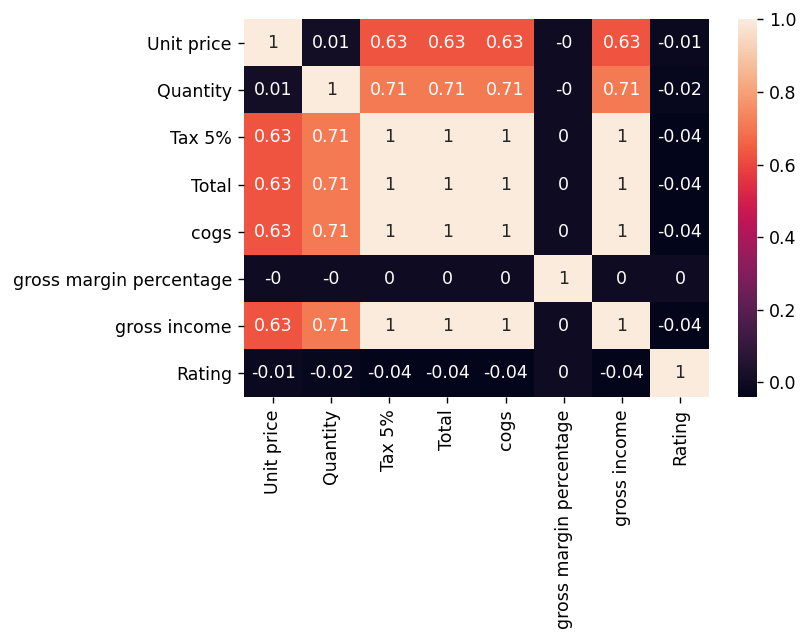

In [ ]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

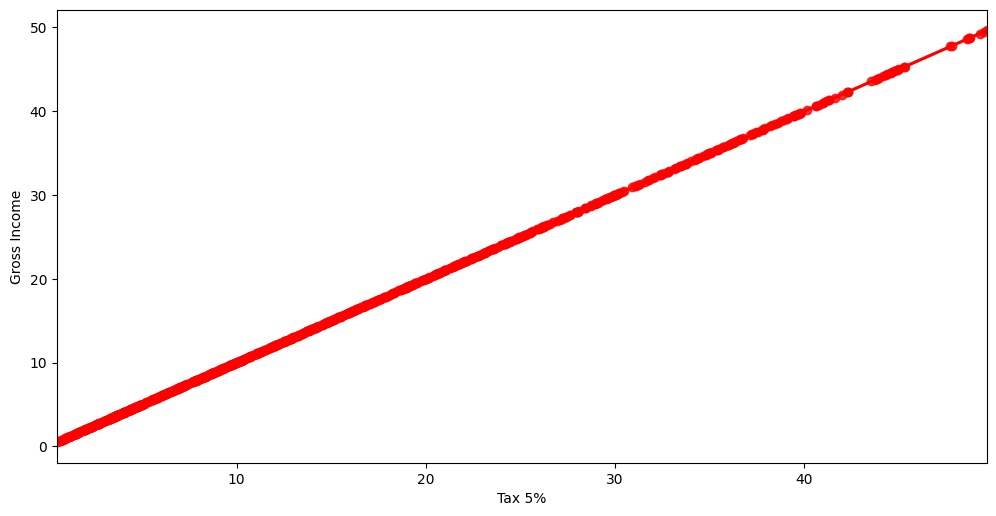

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

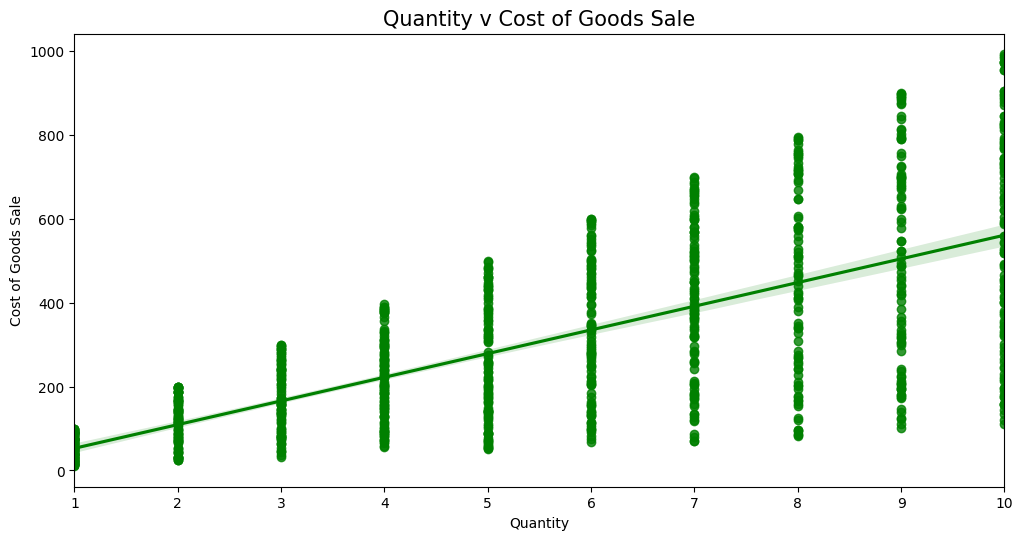

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

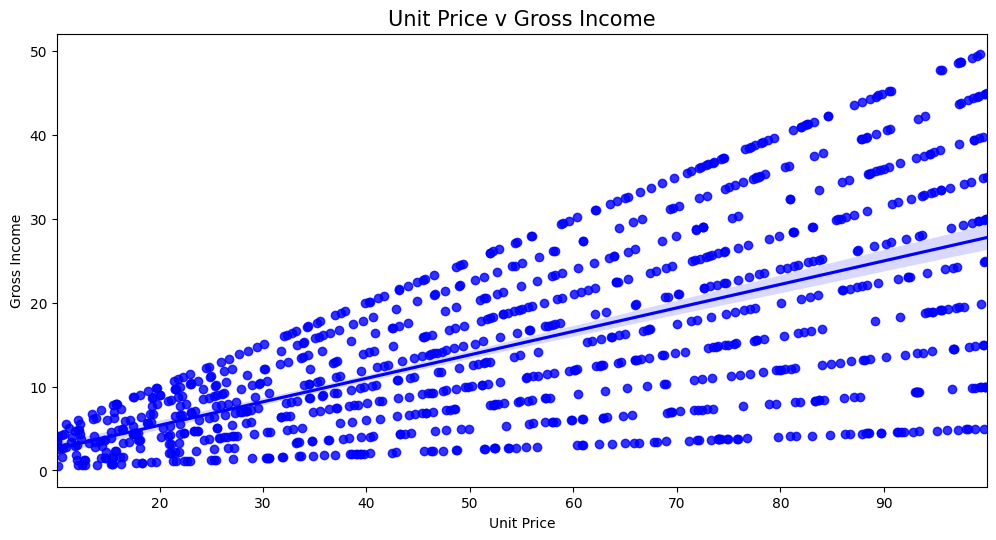

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


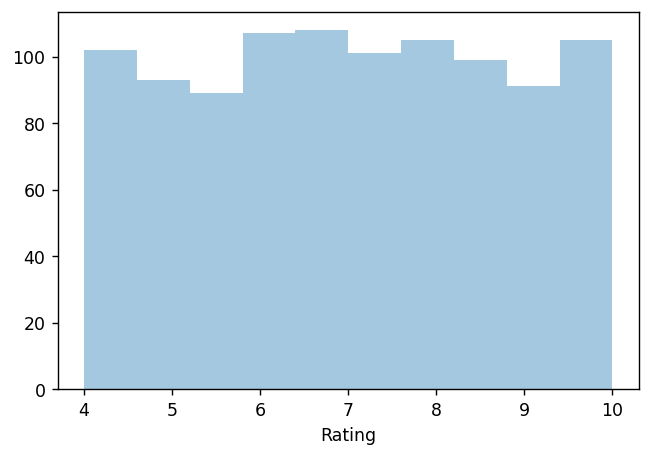

In [ ]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(sales['Rating'],kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


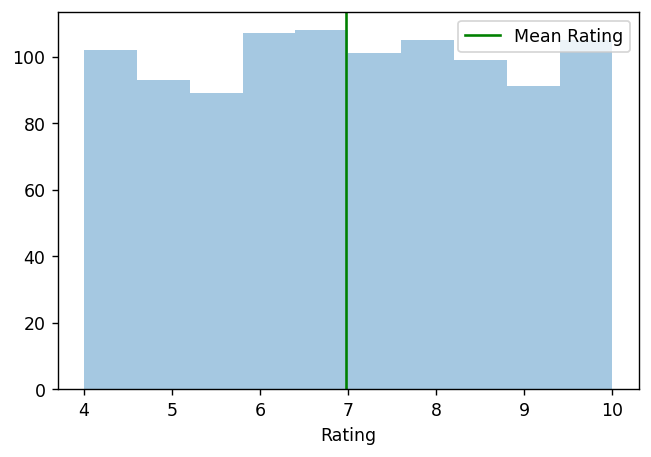

In [ ]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

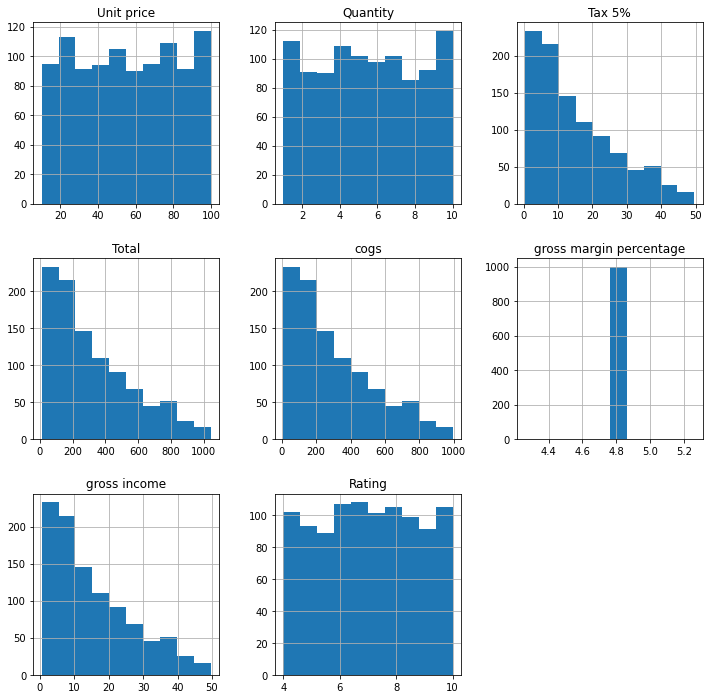

In [ ]:
# Plotting Histogram for all
sales.hist(figsize=(12,12))
plt.show()

Branch A - 340
Branch B - 328
Branch C - 332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


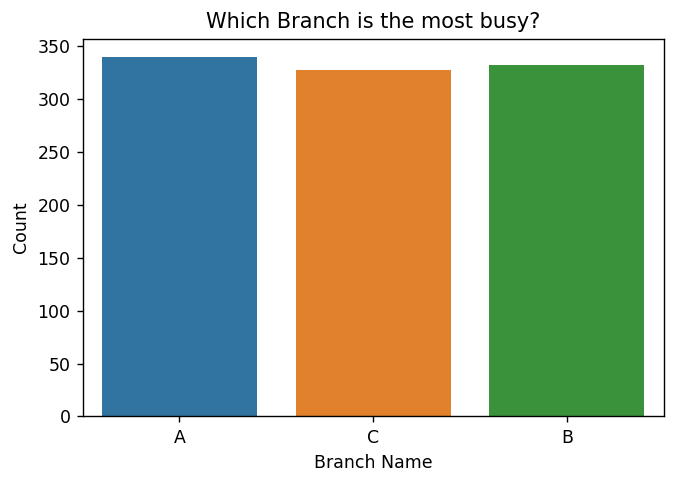

In [ ]:
# Branch Count
plt.figure(dpi=125)
sns.countplot(sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =sales.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)
      

plt.show()

E-wallet - 345
Cash - 344
Credit Card - 311


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


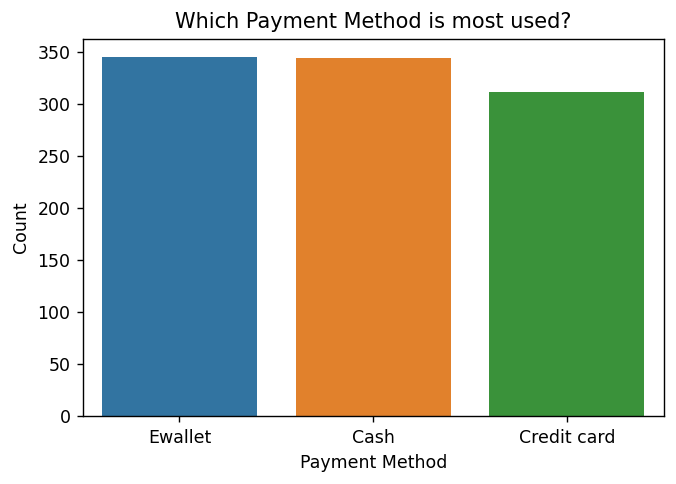

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =sales.Payment.value_counts()

print('E-wallet -',A)
print('Cash -',B)
print('Credit Card -',C)
plt.show()

Yangon - 340
Naypyitow - 328
Mandalay - 332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


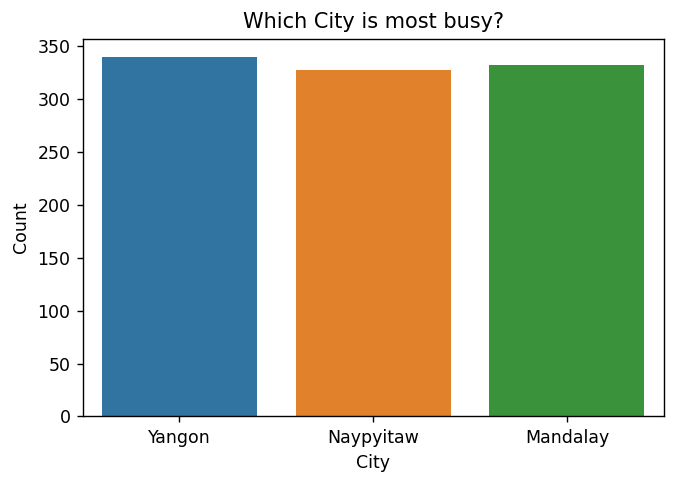

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C =sales.City.value_counts()

print('Yangon -',A)
print('Naypyitow -',C)
print('Mandalay -',B)
plt.show()

Male- 499
Female - 501


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


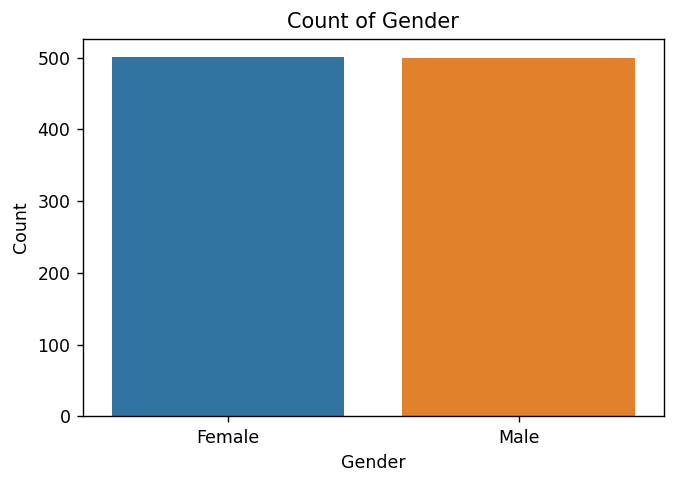

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
A,B =sales.Gender.value_counts()

print('Male-',B)
print('Female -',A)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


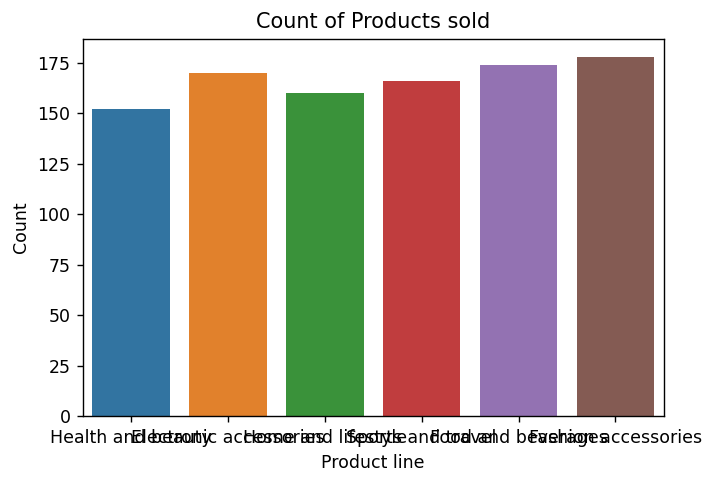

In [15]:
plt.figure(dpi=125)
sns.countplot(sales['Product line'])
plt.xlabel('Product line')
plt.ylabel('Count')
plt.title('Count of Products sold')
plt.show()

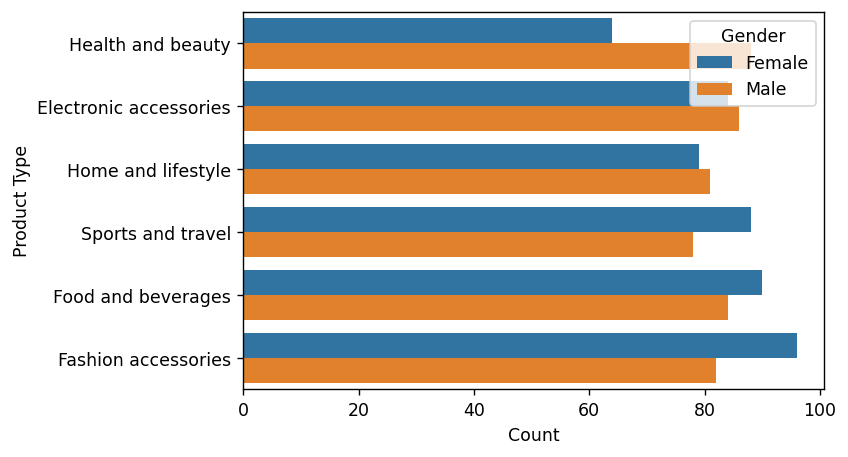

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

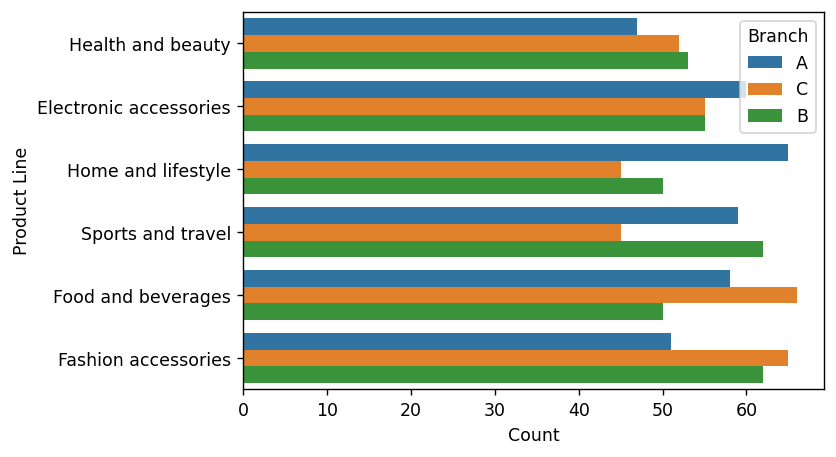

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Branch", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()